In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install shapash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.1/653.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 41.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.0 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013920 sha256=23923b01243a471ee498cb6f50d9ddb6928ac1950f14e9a9552f970fbb7530f2
  Stored in directory: /root/.cache/pip/wheels/6c/04/c8/22a0b5a26c3ecb61e17a27d4bbe7fad32d1417bbdbd4d46acf
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl siz

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from shapash.explainer.smart_explainer import SmartExplainer
import shap


from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [5]:
df_X_train = pd.read_csv('/content/drive/MyDrive/Research Trends/Data/df_X_train.csv')
df_X_test = pd.read_csv('/content/drive/MyDrive/Research Trends/Data/df_X_test.csv')
df_y_train = pd.read_csv('/content/drive/MyDrive/Research Trends/Data/df_y_train.csv')
df_y_test = pd.read_csv('/content/drive/MyDrive/Research Trends/Data/df_y_test.csv')

In [6]:
X_train = df_X_train.values
X_test = df_X_test.values
y_train = df_y_train.values
y_test = df_y_test.values

In [7]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Info] Number of positive: 4645, number of negative: 16355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3262
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221190 -> initscore=-1.258742
[LightGBM] [Info] Start training from score -1.258742


LGBMClassifier()

In [8]:
y_pred = lgb_model.predict(X_test)

In [9]:
cm = confusion_matrix(y_test, y_pred)

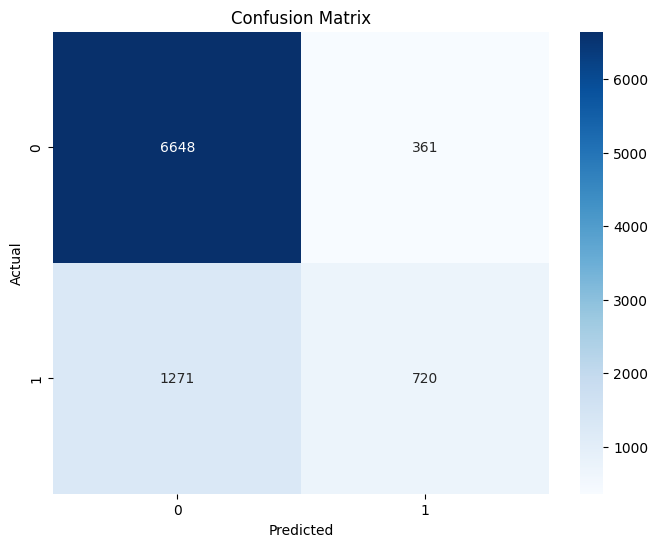

In [10]:
# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.36      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [12]:
explainer = shap.TreeExplainer(lgb_model)

In [15]:
xpl = SmartExplainer(features_dict=dict(zip(df_X_train.columns, df_X_train.columns)), model=lgb_model)

In [26]:
xpl.compile(x=df_X_test)


INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7ff35fbf0820>


In [27]:
summary_plot = xpl.plot.features_importance()

In [28]:
summary_plot.show()

In [30]:
import pickle

# Assuming you have trained your model and stored it in the 'model' variable

# Save the model using pickle
with open('lgb_model.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

In [32]:
!mv "/content/lgb_model.pkl" "/content/drive/MyDrive/Research Trends/Models/lgb_model.pkl"
